In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mobile_dataset.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
len(df.columns)

21

In [6]:
### Univaraite Selection
X = df.iloc[:,:-1]
y=df['price_range']

In [7]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [8]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
# Apply SelectKBest algorithm
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_rank_features.fit(X,y)

In [11]:
dfScores = pd.DataFrame(ordered_feature.scores_, columns=['Scores'])

In [12]:
dfColumns = pd.DataFrame(X.columns)

In [13]:
features_rank = pd.concat([dfColumns, dfScores],axis =1)

In [14]:
features_rank

,0,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [15]:
features_rank.columns=['Features', "Scores"]

In [16]:
features_rank.nlargest(10,"Scores")

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Feature Importance
This technique gives u a score for each feature of your data , the higher the score, mre relevant is ur data

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [19]:
print(model.feature_importances_)

[0.06120559 0.02014136 0.0328141  0.01998244 0.03173671 0.01693782
 0.03476205 0.03300581 0.03596656 0.032038   0.03347298 0.04630793
 0.04859877 0.39772316 0.03446308 0.03344377 0.03556139 0.0139275
 0.01822888 0.01968211]


In [20]:
rank_feature = pd.Series(model.feature_importances_, index = X.columns)

In [21]:
rank_feature

battery_power    0.061206
blue             0.020141
clock_speed      0.032814
dual_sim         0.019982
fc               0.031737
four_g           0.016938
int_memory       0.034762
m_dep            0.033006
mobile_wt        0.035967
n_cores          0.032038
pc               0.033473
px_height        0.046308
px_width         0.048599
ram              0.397723
sc_h             0.034463
sc_w             0.033444
talk_time        0.035561
three_g          0.013928
touch_screen     0.018229
wifi             0.019682
dtype: float64

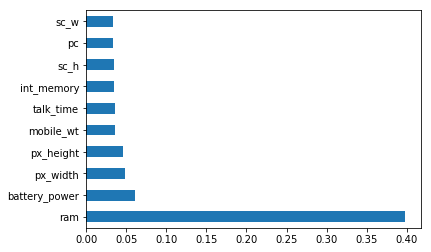

In [22]:
rank_feature.nlargest(10).plot(kind = 'barh')
plt.show()

### Correlation

In [23]:
import seaborn as sns

In [24]:
corr = df.iloc[:,:-1].corr()

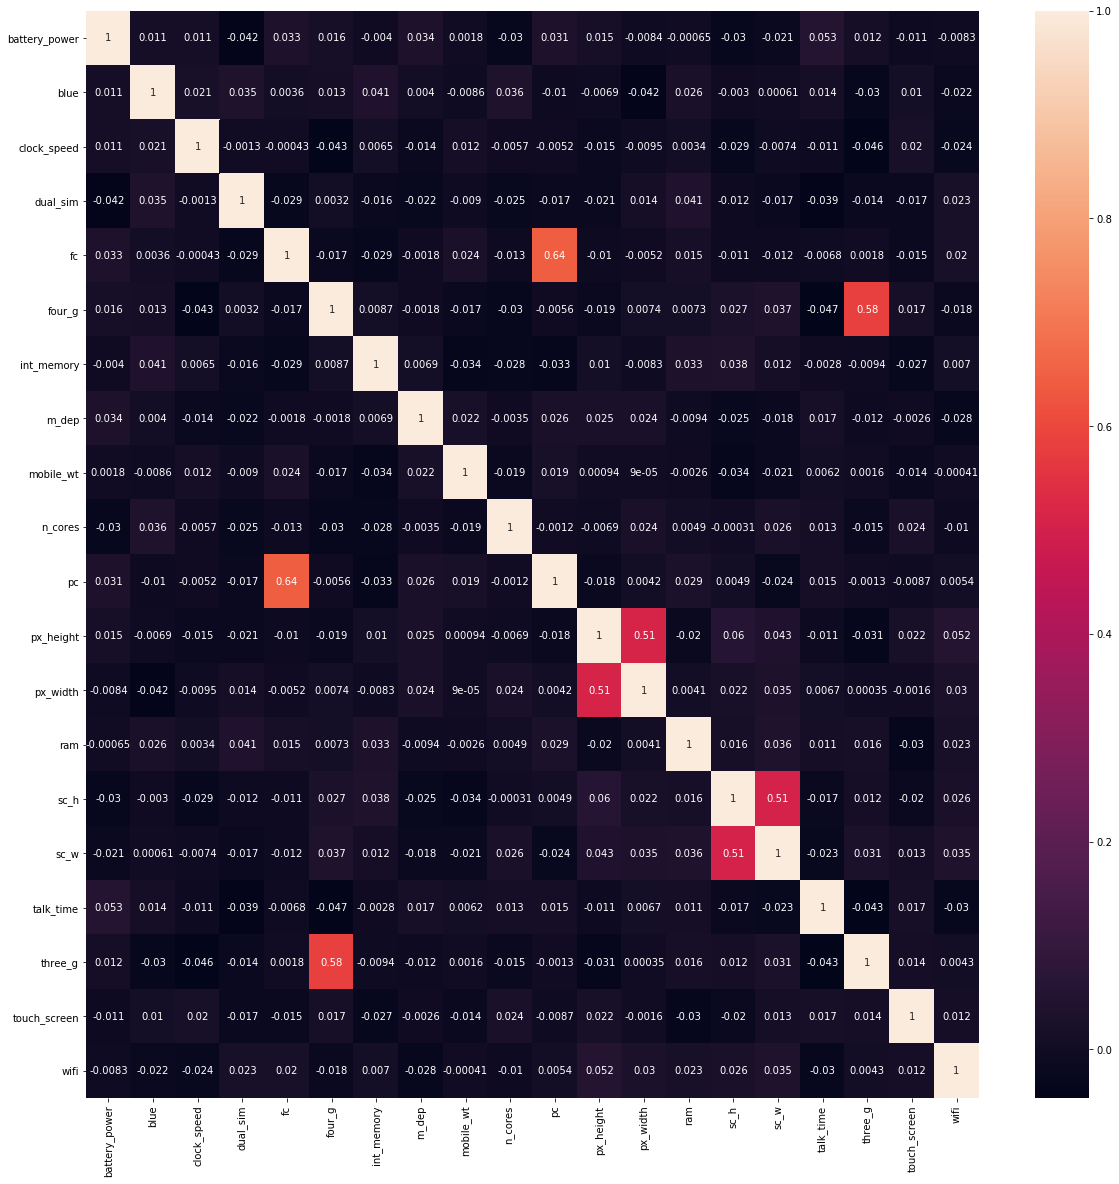

In [25]:
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [26]:
threshold = 0.8

In [29]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i,j])>threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [30]:
correlation(df.iloc[:,:-1],threshold)

set()

## Information gain


In [33]:
from sklearn.feature_selection import mutual_info_classif

In [34]:
mutual_info = mutual_info_classif(X,y)

In [35]:
mutual_data = pd.Series(mutual_info, index = X.columns)
mutual_data.sort_values(ascending = False)

ram              0.847042
px_width         0.030052
battery_power    0.027115
px_height        0.025303
dual_sim         0.017980
pc               0.010640
clock_speed      0.009604
wifi             0.008817
n_cores          0.005874
mobile_wt        0.005145
sc_h             0.000000
sc_w             0.000000
touch_screen     0.000000
m_dep            0.000000
int_memory       0.000000
four_g           0.000000
fc               0.000000
talk_time        0.000000
three_g          0.000000
blue             0.000000
dtype: float64